# Projet AARN, Par:
Yousfi Zakaria 171732026950 Sii G3

# Résumé

## Acquisition de la base d’apprentissage

il y a deux répertoires, spam et ham. répertoire spam contient les emails considéré comme spam, et le répertoire ham contient les emails considéré comme ham.

## Préparation/ transformation de données

un traitement des données a été fait comme il est mentionné dans l'ennoncé du projet. les traiements sont mise dans la fonction transformation qui transforme le text des emails (url,dollar..etc)

## Construction du vocabulaire

un dictionnaire de vocabulaire est construit.

## Visualisation

Après avoir analysé l'histogramme de la distribution des mots entre les classes positive et négative, il est clairement visible qu'il existe un contraste marqué dans l'occurrence de certains groupes de mots entre les deux classes. Certains mots sont nettement plus présents dans une classe que dans l'autre. Cela suggère qu'il existe des caractéristiques distinctives qui peuvent être exploitées pour distinguer efficacement les instances de chaque classe.


## Outils et librairies

Voici les librairies utilisé dans le projet :

# Numpy

NumPy est une bibliothèque populaire et puissante pour le calcul numérique en Python, offrant un large éventail de fonctionnalités pour la manipulation et l'analyse de tableaux multidimensionnels

# Matplotlib

Matplotlib est une bibliothèque de visualisation de données en Python largement utilisée et appréciée.

# NLTK ( Natural Language Toolkit ) 

Librairie pour traiter les emails de traitement de langague, contient des méthodes de traitement de text (stemming, tokenization, ...). Nous utilisons *SnowballStemmer* pour réduire les tokens en à leurs radicaux.

# Scikit-learn 
utilisé pour l'entrainement des algos d'apprentissage machine comme les SVM et les Naive Bayes. aussi utilisé pour les metriques (courbe roc...etc) 
    

## Modèles

### bayes naif

la formule multinomiale est utilisé pour le de calcul de fréquences d'occurences de chaque mot pour les deux classes, qui est favorisé plus que gaussienne dans ce type de problème.

### SVM

SVM avec un noyau simple linéaire.

## sélection du seuil

j'ai utilisé la moyenne géométrique entre la spécificité et la sensibilité pour trouver le meilleur seuil de la classification afin d'améliorer la précision des classifieurs.

## analyse de résultat
a la fin.


In [62]:
# Importation des bibliothèques de base
import os  # pour accéder aux fichiers
import re  # pour les expressions régulières
from collections import Counter  # Conteneur qui garde une trace du nombre d'occurrences de chaque élément

import numpy as np  # Bibliothèque de calcul numérique

import matplotlib.pyplot as plt  # Bibliothèque de visualisation des données

import nltk  # Kit de traitement du langage naturel

from sklearn.svm import SVC  # Classifieur de vecteurs de support de scikit-learn
from sklearn.naive_bayes import MultinomialNB  # Classifieur naïf bayésien multinomial de scikit-learn
from sklearn.model_selection import GridSearchCV  # Recherche en grille avec validation croisée
from sklearn.metrics import accuracy_score  # Métrique de précision pour les tâches de classification
from sklearn.metrics import roc_curve  # Courbe de caractéristique de fonctionnement du récepteur (ROC)

# préparation des données

In [63]:
# fonction du prétraitement des données
def transformation(file):
    file.seek(0)
    
    # Suppression des métadonnées
    while file.readline() != '\n':
        pass
    
    # -> minuscule
    mail = file.read().lower()
    
    # html
    mail = re.sub('<[^<>]+>', ' ', mail)
    
    # dollar
    mail = mail.replace('$', " dollar ")
    
    # urls
    mail = re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', 
                  "httpaddr",
                  mail)
    
    # emails
    mail = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', "emailaddr", mail)
    
    # nombres
    mail = re.sub(r'\d+', "number", mail)
    
    # tokenize
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(mail)
    
    # stemming
    stemmer = nltk.stem.snowball.SnowballStemmer("english")
    tokens = [stemmer.stem(token) for token in tokens if token.isalpha()]
    
    return tokens

# Création du vocabulaire

extractions des tokens apartir du dataset

In [64]:
# Création d'une liste vide pour stocker le vocabulaire brut
raw_vocab = []

# Parcours des fichiers dans le répertoire dataset/spam
for filename in os.listdir(os.path.abspath("dataset/spam")):
    # Ouverture du fichier en utilisant son chemin complet
    with open(os.path.join("dataset/spam", filename), "r", encoding="utf-8") as file_content:
        # Appel de la fonction "transformation" pour traiter le contenu du fichier
        tokens = transformation(file_content)
        # Ajout des tokens résultants au vocabulaire brut
        raw_vocab += tokens

# Parcours des fichiers dans le répertoire dataset/ham
for filename in os.listdir(os.path.abspath("dataset/ham")):
    # Ouverture du fichier en utilisant son chemin complet
    with open(os.path.join("dataset/ham", filename), "r", encoding="utf-8") as file_content:
        # Appel de la fonction "transformation" pour traiter le contenu du fichier
        tokens = transformation(file_content)
        # Ajout des tokens résultants au vocabulaire brut
        raw_vocab += tokens

# Téléchargement des stopwords en anglais à l'aide de NLTK
nltk.download('stopwords', quiet=True)
# Récupération de la liste des stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Filtrage du vocabulaire brut en supprimant les stopwords
raw_vocab = [x for x in raw_vocab if x not in stopwords]

# Affichage du nombre de jetons présents dans le vocabulaire brut
print("Il y a", len(raw_vocab), "tokens dans le vocabulaire")

Il y a 594525 tokens dans le vocabulaire


In [65]:
raw_vocab

['greet',
 'receiv',
 'letter',
 'becaus',
 'express',
 'interest',
 'receiv',
 'inform',
 'onlin',
 'busi',
 'erron',
 'pleas',
 'accept',
 'sincer',
 'mail',
 'remov',
 'burn',
 'betray',
 'market',
 'mlm',
 'pleas',
 'read',
 'could',
 'import',
 'one',
 'ever',
 'land',
 'market',
 'huge',
 'mistak',
 'peopl',
 'mlm',
 'fail',
 'deliv',
 'promis',
 'past',
 'number',
 'pursuit',
 'mlm',
 'dream',
 'cost',
 'hundr',
 'thousand',
 'peopl',
 'friend',
 'fortun',
 'sacr',
 'fact',
 'mlm',
 'fatal',
 'flaw',
 'mean',
 'work',
 'compani',
 'earn',
 'big',
 'money',
 'mlm',
 'go',
 'tell',
 'real',
 'final',
 'someon',
 'courag',
 'cut',
 'hype',
 'lie',
 'tell',
 'truth',
 'good',
 'news',
 'altern',
 'mlm',
 'work',
 'work',
 'big',
 'yet',
 'abandon',
 'dream',
 'need',
 'see',
 'earn',
 'kind',
 'incom',
 'dream',
 'easier',
 'think',
 'permiss',
 'like',
 'send',
 'brief',
 'letter',
 'tell',
 'whi',
 'mlm',
 'doe',
 'work',
 'peopl',
 'introduc',
 'someth',
 'new',
 'refresh',
 'won

Removing the less frequent words, and keeping only the 5 000 most frequent words

In [66]:
# Taille du vocabulaire souhaitée
vocab_size = 5000

# Création d'un compteur à partir du vocabulaire brut
words = Counter(raw_vocab)

# Récupération des mots les plus fréquents pour construire le vocabulaire
vocab = [x[0] for x in words.most_common(vocab_size)]

# Affichage du nombre de mots différents après le nettoyage
print("Il y a", len(vocab), "mots différents après le nettoyage")

Il y a 5000 mots différents après le nettoyage


In [67]:
vocab

['number',
 'nbsp',
 'dollar',
 'httpaddr',
 'emailaddr',
 'email',
 'list',
 'use',
 'get',
 'one',
 'free',
 'mail',
 'new',
 'click',
 'make',
 'pleas',
 'time',
 'ani',
 'address',
 'receiv',
 'work',
 'onli',
 'like',
 'would',
 'inform',
 'busi',
 'messag',
 'order',
 'peopl',
 'web',
 'us',
 'remov',
 'site',
 'want',
 'send',
 'need',
 'compani',
 'system',
 'user',
 'also',
 'go',
 'product',
 'includ',
 'may',
 'linux',
 'report',
 'servic',
 'file',
 'look',
 'program',
 'doe',
 'see',
 'name',
 'internet',
 'chang',
 'offer',
 'softwar',
 'money',
 'call',
 'know',
 'find',
 'year',
 'way',
 'day',
 'right',
 'home',
 'take',
 'group',
 'price',
 'help',
 'even',
 'read',
 'could',
 'check',
 'first',
 'market',
 'anumb',
 'window',
 'subscript',
 'start',
 'link',
 'quot',
 'becaus',
 'much',
 'say',
 'mani',
 'veri',
 'month',
 'secur',
 'provid',
 'wrote',
 'ad',
 'network',
 'server',
 'good',
 'avail',
 'credit',
 'person',
 'comput',
 'state',
 'week',
 'tri',
 'phone

We map each token to an integer from 1 to 5000, whereas 0 represent a pading token

In [68]:
word_to_index = {}

# Parcours des mots du vocabulaire avec leurs index
for index, word in enumerate(vocab):
    # Assignation de l'index + 1 au mot dans le dictionnaire word_to_index
    word_to_index[word] = index + 1


In [69]:
word_to_index

{'number': 1,
 'nbsp': 2,
 'dollar': 3,
 'httpaddr': 4,
 'emailaddr': 5,
 'email': 6,
 'list': 7,
 'use': 8,
 'get': 9,
 'one': 10,
 'free': 11,
 'mail': 12,
 'new': 13,
 'click': 14,
 'make': 15,
 'pleas': 16,
 'time': 17,
 'ani': 18,
 'address': 19,
 'receiv': 20,
 'work': 21,
 'onli': 22,
 'like': 23,
 'would': 24,
 'inform': 25,
 'busi': 26,
 'messag': 27,
 'order': 28,
 'peopl': 29,
 'web': 30,
 'us': 31,
 'remov': 32,
 'site': 33,
 'want': 34,
 'send': 35,
 'need': 36,
 'compani': 37,
 'system': 38,
 'user': 39,
 'also': 40,
 'go': 41,
 'product': 42,
 'includ': 43,
 'may': 44,
 'linux': 45,
 'report': 46,
 'servic': 47,
 'file': 48,
 'look': 49,
 'program': 50,
 'doe': 51,
 'see': 52,
 'name': 53,
 'internet': 54,
 'chang': 55,
 'offer': 56,
 'softwar': 57,
 'money': 58,
 'call': 59,
 'know': 60,
 'find': 61,
 'year': 62,
 'way': 63,
 'day': 64,
 'right': 65,
 'home': 66,
 'take': 67,
 'group': 68,
 'price': 69,
 'help': 70,
 'even': 71,
 'read': 72,
 'could': 73,
 'check': 74,


La création d'une classe qui charge les fichiers et gère la transformation.

In [70]:
def transform(file):
    # Applique une transformation sur le fichier
    tokens = transformation(file)
    
    # Encode les tokens en utilisant word_to_index, en excluant les mots inconnus (index 0)
    encoded_tokens = [word_to_index.get(word, 0) for word in tokens if word in word_to_index]
    
    # Retourne les tokens encodés
    return encoded_tokens

In [71]:
class getData(Dataset):
    def __init__(self, pos_files, neg_files):
               
        self.pos_files = pos_files
        self.neg_files = neg_files
        
        self.mails = []
        
        # Parcourt les fichiers de la classe positive
        for file in self.pos_files:
            # Chemin du fichier spam
            mail_path = os.path.join("dataset/spam", file)
            # Étiquette de classe (1 pour la classe positive)
            label = 1
            # Ouvre le fichier et applique la transformation aux mots
            with open(mail_path, "r", encoding="utf-8") as file:
                mail = [0] + transform(file)
            # Ajoute d'émail et l'étiquette à la liste
            self.mails.append((mail, label))
        
        # Parcourt les fichiers de la classe négative
        for file in self.neg_files:
            # Chemin du fichier ham
            mail_path = os.path.join("dataset/ham", file)
            # Étiquette de classe (0 pour la classe négative)
            label = 0
            # Ouvre le fichier et applique la transformation aux mots
            with open(mail_path, "r", encoding="utf-8") as file:
                mail = [0] + transform(file)
            # Addition d'email et l'étiquette à la liste
            self.mails.append((mail, label))
    def __len__(self):
        return len(self.mails)
    
    def __getitem__(self, idx):
        mail, label = self.mails[idx]
        return torch.unsqueeze(torch.as_tensor(mail), dim=-1).float(), torch.as_tensor(label).float()

Creating test and train sets by randomly splitting files from both spam and ham folder and assigning them to either test or train set.

In [72]:
def create_train_test_dataset(
        test_ratio=0.3,
        positive_class_dir="dataset/spam",
        negative_class_dir="dataset/ham"):
    
    # Récupère la liste des fichiers de la classe positive
    pos_files = os.listdir(os.path.abspath(positive_class_dir))
    
    # Récupère la liste des fichiers de la classe négative
    neg_files = os.listdir(os.path.abspath(negative_class_dir))
    
    # Mélange les indices des fichiers de la classe positive
    shuffled_pos_indices = np.random.permutation(len(pos_files))
    
    # Mélange les indices des fichiers de la classe négative
    shuffled_neg_indices = np.random.permutation(len(neg_files))

    # Calcule la taille de l'ensemble de test pour la classe positive
    pos_test_set_size = int(len(pos_files) * test_ratio)
    
    # Calcule la taille de l'ensemble de test pour la classe négative
    neg_test_set_size = int(len(neg_files) * test_ratio)
    
    # Récupère les indices des fichiers pour l'ensemble d'entraînement de la classe positive
    pos_train_indices = shuffled_pos_indices[pos_test_set_size:]
    
    # Récupère les indices des fichiers pour l'ensemble de test de la classe positive
    pos_test_indices = shuffled_pos_indices[:pos_test_set_size]
    
    # Récupère les indices des fichiers pour l'ensemble d'entraînement de la classe négative
    neg_train_indices = shuffled_neg_indices[neg_test_set_size:]
    
    # Récupère les indices des fichiers pour l'ensemble de test de la classe négative
    neg_test_indices = shuffled_neg_indices[:neg_test_set_size]
    
    # Récupère les noms des fichiers d'entraînement de la classe positive
    pos_train_files = [pos_files[i] for i in pos_train_indices]
    
    # Récupère les noms des fichiers d'entraînement de la classe négative
    neg_train_files = [neg_files[i] for i in neg_train_indices]
    
    # Récupère les noms des fichiers de test de la classe positive
    pos_test_files = [pos_files[i] for i in pos_test_indices]
    
    # Récupère les noms des fichiers de test de la classe négative
    neg_test_files = [neg_files[i] for i in neg_test_indices]
    
    # Crée l'ensemble de données d'entraînement en utilisant la classe getData
    train_dataset = getData(pos_train_files, neg_train_files)
    
    # Crée l'ensemble de données de test en utilisant la classe getData
    test_dataset = getData(pos_test_files, neg_test_files)
    
    # Retourne l'ensemble de données d'entraînement et l'ensemble de données de test
    return train_dataset, test_dataset


# MODELS

In [73]:
train_dataset, test_dataset = create_train_test_dataset()

In [74]:
train_dataset.mails[0]

([0, 27, 429, 3122, 964], 1)

In [75]:
test_dataset.mails[0]

([0, 27, 429, 3122, 964], 1)

Text(0.5, 1.0, 'difference histogram')

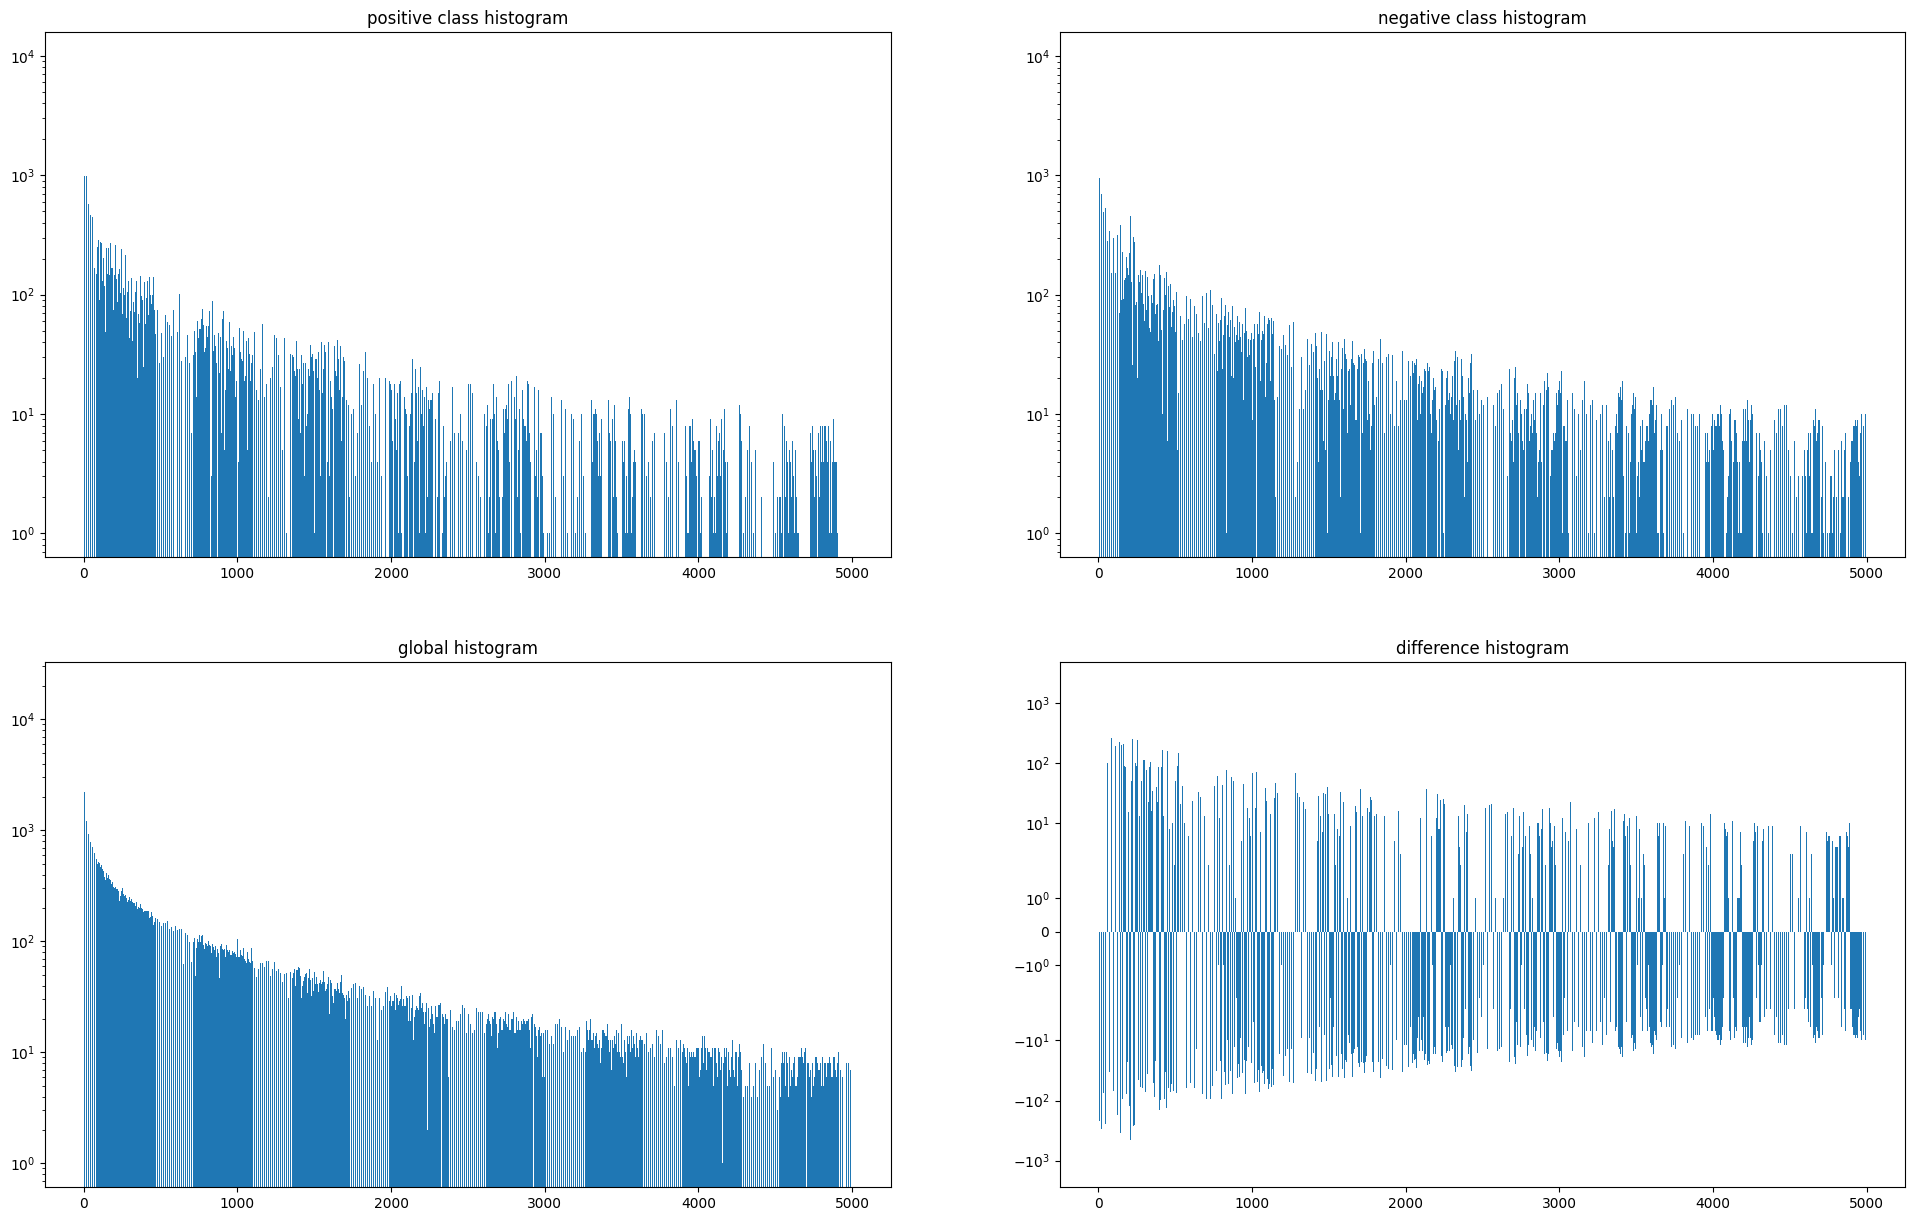

In [76]:
# visualisation des mots
hist = np.zeros((vocab_size,))
pos_hist = np.zeros((vocab_size,))
neg_hist = np.zeros((vocab_size,))
for x, y in train_dataset:
    for word in x:
        hist[int(word.item()) - 1] += 1
        if y == 0:
            neg_hist[int(word.item()) - 1] += 1
        else:
            pos_hist[int(word.item()) - 1] += 1

plt.figure(figsize=(24, 15))


plt.subplot(2, 2, 1)
plt.bar(list(range(vocab_size)), pos_hist)
plt.yscale('log')
plt.title("positive class histogram")

plt.subplot(2, 2, 2)
plt.bar(list(range(vocab_size)), neg_hist)
plt.yscale('log')
plt.title("negative class histogram")

plt.subplot(2, 2, 3)
plt.bar(list(range(vocab_size)), hist)
plt.yscale('log')
plt.title("global histogram")

plt.subplot(2, 2, 4)
plt.bar(list(range(vocab_size)), pos_hist - neg_hist)
plt.yscale("symlog")
plt.title("difference histogram")

# bayes naïf

In [77]:
def email_bin_embedding(email):
    embedding = np.zeros((1, vocab_size))
    for word_index in email:
        if (word_index.int().item() > 0):
            embedding[0, word_index.int().item() - 1] = 1
    return embedding

In [78]:
# Conversion des données d'entraînement en format adapté pour l'apprentissage automatique
train_full = np.asarray([np.append(email_bin_embedding(x[0]), x[1].item()) for x in train_dataset])
train_X, train_Y = train_full[:, :-1], train_full[:, -1]

# Conversion des données de test en format adapté pour l'apprentissage automatique
test_full = np.asarray([np.append(email_bin_embedding(x[0]), x[1].item()) for x in test_dataset])
test_X, test_y = test_full[:, :-1], test_full[:, -1]

# Affichage des dimensions des ensembles d'entraînement et de test
print("train set: x {}, y {}\ntest set: x {}, y {}".format(train_X.shape, train_Y.shape, test_X.shape, test_y.shape))

train set: x (2133, 5000), y (2133,)
test set: x (913, 5000), y (913,)


In [79]:
# Création et ajustement d'un modèle de classification naïve bayésienne multinomiale
bin_nb_model = MultinomialNB()
bin_nb_model.fit(train_X, train_Y)

MultinomialNB()

In [80]:
# Prédiction des classes pour les ensembles d'entraînement et de test
train_prediction = bin_nb_model.predict(train_X)
test_prediction = bin_nb_model.predict(test_X)

# Calcul de l'exactitude (accuracy) pour les ensembles d'entraînement et de test
train_accuracy = (train_prediction == train_Y).mean() * 100
test_accuracy = (test_prediction == test_y).mean() * 100

# Affichage de l'exactitude (accuracy) pour les ensembles d'entraînement et de test
print("train accuracy: {0:.10f}%".format(train_accuracy))
print("test accuracy: {0:.10f}%".format(test_accuracy))

train accuracy: 97.8434130333%
test accuracy: 97.0427163198%


with threshold = 0.458509142053446 | test accuracy is 97.15%


Text(0.5, 0, 'False positive rate')

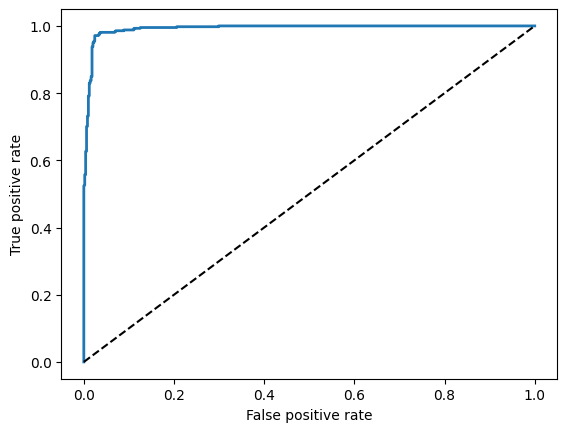

In [81]:
# Prédiction des scores de classe pour les ensembles d'entraînement et de test
train_prediction_scores = bin_nb_model.predict_proba(train_X)[:, 1]
test_prediction_scores = bin_nb_model.predict_proba(test_X)[:, 1]

# Calcul de la courbe ROC (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(test_y, test_prediction_scores)

# Calcul de G-Mean pour chaque seuil de classification
gmeans = np.sqrt(tpr * (1-fpr))

# Obtention de l'indice du seuil qui maximise G-Mean
ix = np.argmax(gmeans)

# Récupération du seuil correspondant
threshold = thresholds[ix]

# Classification des prédictions en utilisant le seuil
test_prediction = np.asarray([1 if x > threshold else 0 for x in test_prediction_scores])

# Calcul de l'exactitude (accuracy) avec le seuil choisi
accuracy = (test_prediction == np.asarray(test_y)).mean() * 100

# Affichage de l'exactitude (accuracy) avec le seuil choisi
print("with threshold = {0} | test accuracy is {1:.2f}%".format(threshold, accuracy))

# Tracé de la courbe ROC
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

# SVM

In [82]:
bin_svm_model = SVC(C=0.1, kernel="linear", random_state=42)
bin_svm_model.fit(train_X, train_Y)

SVC(C=0.1, kernel='linear', random_state=42)

In [83]:
train_prediction = bin_svm_model.predict(train_X)
test_prediction = bin_svm_model.predict(test_X)

train_accuracy = (train_prediction == train_Y).mean() * 100
test_accuracy = (test_prediction == test_y).mean() * 100

print("train accuracy: {0:.10f}%".format(train_accuracy))
print("test accuracy: {0:.10f}%".format(test_accuracy))

train accuracy: 99.8124706985%
test accuracy: 96.3855421687%


with threshold = 0.03139239415163986 | test accuracy is 96.71%


Text(0.5, 0, 'False positive rate')

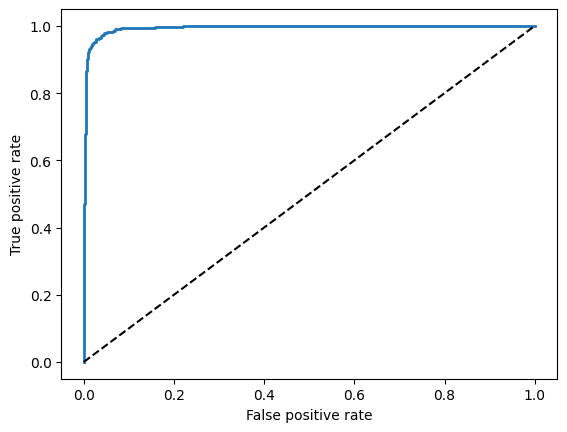

In [84]:
train_prediction_scores = bin_svm_model.decision_function(train_X)
test_prediction_scores = bin_svm_model.decision_function(test_X)

fpr, tpr, thresholds = roc_curve(test_y, test_prediction_scores)

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
threshold = thresholds[ix]
test_prediction = np.asarray([ 1 if x > threshold else 0 for x in test_prediction_scores])
print("with threshold = {0} | test accuracy is {1:.2f}%"
      .format(threshold, (test_prediction==np.asarray(test_y)).mean() * 100))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

# Analyse des résultats

Les résultats montrent que les deux modèles, le Naive Bayes et le SVM, obtiennent de bonnes performances en 
termes de précision (accuracy) pour la classification. Le modèle Naive Bayes atteint une précision de 97,15%, 
tandis que le modèle SVM atteint une précision légèrement inférieure de 96,71%.

Ces pourcentages élevés d'accuracy indiquent que les deux modèles ont réussi à classifier correctement 
la grande majorité des échantillons de test. 